## Gaussian Plume (similarity theory)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gplume_similarity
import conversion

from scipy.integrate import trapz

%matplotlib inline

## Grid and Constants

Rate is the assumed release rate in kg/h and height in meters. The grid size is also in meters. In this specific case, the x- and y- domain are 500 meters with a resoluton of 5 meters. The concentration is computed up to a height of 11 meters with a resolution of 0.5 meters.

The sources is placed in the in the coordinate $(x,y) -> (0,0)$ and $H$ is the height where the methane is released.

In [2]:
rate = 0.72
H = 1.3

xGrid = np.arange(0.1, 500, 5)
yGrid = np.arange(-250, 250, 5)
zGrid = np.arange(0.1,11,0.5)

fcor = gplume_similarity.coriolis(47)
pointSource = gplume_similarity.pointSource(0, 0, rate, H)
grid = gplume_similarity.receptorGrid(xGrid, yGrid, zGrid)

## METEOROLOGY

Here, the standard deviations of the gaussian plume is computed using 3 different parameters. These are the wind speed, obukhov length, and friction velocity

In [3]:
U = 5.467        # Wind speed
L = -158.815     # Obukhov length
u_star = 0.385   # Friction velocity

blh = gplume_similarity.bl_height(u_star, L, fcor)
sigma_y = gplume_similarity.sigma_y(zGrid, u_star, L, blh, fcor)
sigma_z = gplume_similarity.sigma_z(zGrid, u_star, L, blh, fcor)

## CONCENTRATION

The concentration obtained is obtained and is shown in the plot below. In this case the plume in the plot is in obtained at a height of 1m.

The array "conc" is a 3D array with a structure of (z,y,x) where z corresponds to the vertical layer, and y and x correspond to the horizontal extent

Text(0,0.5,'Y [m]')

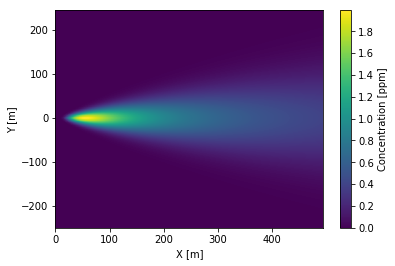

In [4]:
a = gplume_similarity.gaussianPlume(pointSource, grid, sigma_y, sigma_z, blh, fcor, U)

conc = a.calculateConcentration() # g/m^3
conc = conc*1e6                   # convert to ug/m^3

ppm_conc = conversion.micro2ppm(conc, mass=16.04)  # convert ug/m^3 to ppm

fig, ax = plt.subplots()
c = ax.contourf(xGrid, yGrid, ppm_conc[1,:,:], 1000) #1m above the ground ppm[1,:,:]
cb = fig.colorbar(c)
cb.set_label('Concentration [ppm]')
ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')

## TRANSECT

The plot below shows the mixing ratio being sampled 100 meters away from the source. 

Text(0,0.5,'$CH_4$ (ppm)')

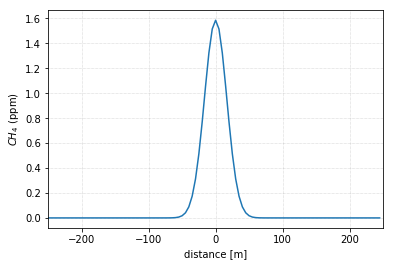

In [5]:
fig, ax = plt.subplots()
ax.plot(yGrid, ppm_conc[1,:,20])  ## 20*5 = 100 meters away
ax.grid(linewidth=0.5, color="grey", linestyle="dotted", alpha=0.65)
ax.set_xlim([-250, 250])
ax.set_xlabel("distance [m]")
ax.set_ylabel("$CH_4$ (ppm)")

The plot below shows the mixing ratio being sampled 300 meters away from the source

Text(0,0.5,'$CH_4$ (ppm)')

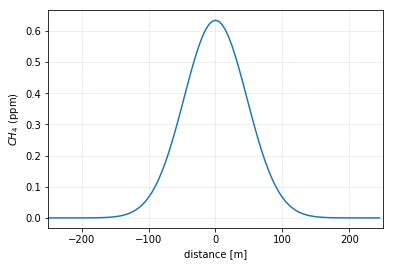

In [6]:
fig, ax = plt.subplots()
ax.plot(yGrid, ppm_conc[1,:,60])
ax.grid(linewidth=0.5, color="grey", linestyle="dotted", alpha=0.65)
ax.set_xlim([-250, 250])
ax.set_xlabel("distance [m]")
ax.set_ylabel("$CH_4$ (ppm)")

The plot below shows the vetical profile taken from the centerline of the plume at a distance of 100 meters away from the soruce (ppm_conc[:,50,20] i.e., 50 is the centerline of the plume and 20 is 100 meters away from the source.

Text(0,0.5,'distance [m]')

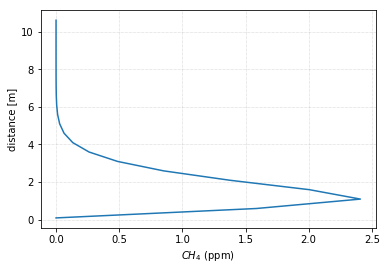

In [7]:
fig, ax = plt.subplots()
ax.plot(ppm_conc[:,50,20], zGrid)
ax.grid(linewidth=0.5, color="grey", linestyle="dotted", alpha=0.65)
ax.set_xlabel("$CH_4$ (ppm)")
ax.set_ylabel("distance [m]")

The plot below shows the vetical profile taken from the centerline of the plume at a distance of 100 meters away from the soruce (ppm_conc[:,50,20] i.e., 50 is the centerline of the plume and 20 is 100 meters away from the source.

Text(0,0.5,'distance [m]')

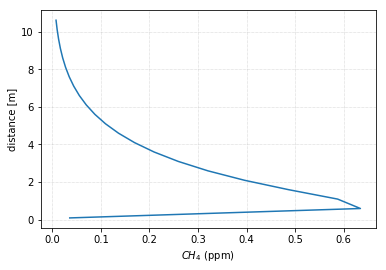

In [8]:
fig, ax = plt.subplots()
ax.plot(ppm_conc[:,50,60], zGrid)
ax.grid(linewidth=0.5, color="grey", linestyle="dotted", alpha=0.65)
ax.set_xlabel("$CH_4$ (ppm)")
ax.set_ylabel("distance [m]")

## FLUX ESTIMATION

At a 100 meter distance downwind, the flux can be estimated by integrating the plume at the sampling height then multiplying it to the mean wind speed. In this case, the sampling height is at 2 meters

In [9]:
integral = trapz(x=yGrid, y=conc[4,:,20]) # conc[4,:,20] index 4 means that it is taken at a height of 2 meters (0.5m * 4)
flux = integral * U


print("The estimated flux is %8.2f ug/s" % flux)

The estimated flux is 209534.03 ug/s
